In [1]:
from keras import applications
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras import backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping, TensorBoard
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.optimizers import Adadelta, Adam, Adagrad, RMSprop
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
img_width, img_height = 80, 60
train_data_dir = "C:/Users/shuaix/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
val_data_dir = "C:/Users/shuaix/Dropbox/Data_Science/Final_Capstone/blood-cells/dataset-master/dataset-master/data/TRAIN"
nb_train_samples = 5000
nb_validation_samples = 1000 
batch_size = 32
epochs = 20

In [3]:
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 60, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 15, 128)       0         
__________

In [5]:
for layer in model.layers[:5]:
    layer.trainable = False

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu")(x)
predictions = Dense(4, activation="softmax")(x)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model_final = Model(input = model.input, output = predictions)

C:\Users\shuaix\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [8]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        validation_split=0.2)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_width,img_height),
batch_size = batch_size, 
class_mode = "categorical",subset='training')

validation_generator = train_datagen.flow_from_directory(
val_data_dir,
target_size = (img_width,img_height),
class_mode = "categorical",subset='validation')

Found 7087 images belonging to 4 classes.
Found 1769 images belonging to 4 classes.


In [10]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [11]:
history = model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

Instructions for updating:
Use tf.cast instead.


C:\Users\shuaix\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\shuaix\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=20, validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=156, validation_steps=1000)`
  import sys


Epoch 1/20
156/156 [==============================] - 1438s 9s/step - loss: 1.4377 - acc: 0.2819 - val_loss: 1.3195 - val_acc: 0.3927

Epoch 00001: val_acc improved from -inf to 0.39267, saving model to vgg16_1.h5
Epoch 2/20
156/156 [==============================] - 1399s 9s/step - loss: 1.2871 - acc: 0.3854 - val_loss: 1.1772 - val_acc: 0.4530

Epoch 00002: val_acc improved from 0.39267 to 0.45305, saving model to vgg16_1.h5
Epoch 3/20
156/156 [==============================] - 1386s 9s/step - loss: 1.1478 - acc: 0.4606 - val_loss: 1.0445 - val_acc: 0.5241

Epoch 00003: val_acc improved from 0.45305 to 0.52412, saving model to vgg16_1.h5
Epoch 4/20
156/156 [==============================] - 1434s 9s/step - loss: 1.0365 - acc: 0.5333 - val_loss: 0.9061 - val_acc: 0.6124

Epoch 00004: val_acc improved from 0.52412 to 0.61242, saving model to vgg16_1.h5
Epoch 5/20
156/156 [==============================] - 1423s 9s/step - loss: 0.9128 - acc: 0.6024 - val_loss: 0.7856 - val_acc: 0.6612



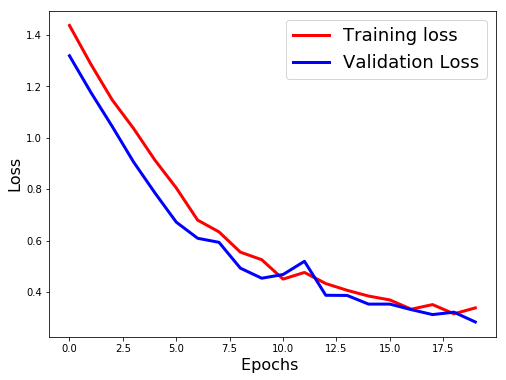

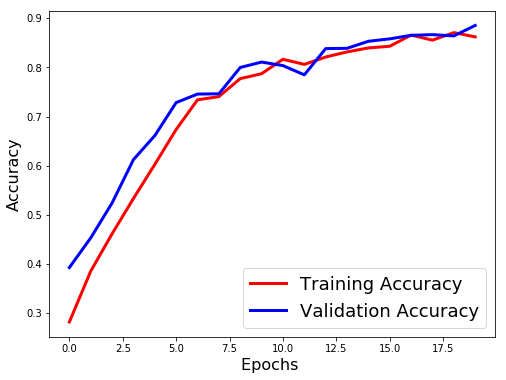

In [12]:
# Loss Curves
plt.figure(figsize=[8,6]);
plt.plot(history.history['loss'],'r',linewidth=3.0);
plt.plot(history.history['val_loss'],'b',linewidth=3.0);
plt.legend(['Training loss', 'Validation Loss'],fontsize=18);
plt.xlabel('Epochs ',fontsize=16);
plt.ylabel('Loss',fontsize=16);

   

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0);
plt.plot(history.history['val_acc'],'b',linewidth=3.0);
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18);
plt.xlabel('Epochs ',fontsize=16);
plt.ylabel('Accuracy',fontsize=16);
